In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
np.sqrt(df["fare"].var())

49.6934285971809

In [5]:
df["fare"].std()

49.6934285971809

In [6]:
fare_mean=df["fare"].values.mean()
fare_mean

32.204207968574636

In [12]:
fare_std=np.sqrt(((df["fare"].values-fare_mean)**2).sum()/(len(df["fare"])-1)) # 괄호 신경써서 사용하기.
fare_std

49.6934285971809

In [13]:
df["age"].min()

0.42

In [14]:
df["age"].max()

80.0

In [15]:
df.kurtosis()

C:\Users\ajouu\AppData\Local\Temp\ipykernel_20700\615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


survived      -1.775005
pclass        -1.280015
age            0.178274
sibsp         17.880420
parch          9.778125
fare          33.398141
adult_male    -1.827345
alone         -1.827345
dtype: float64

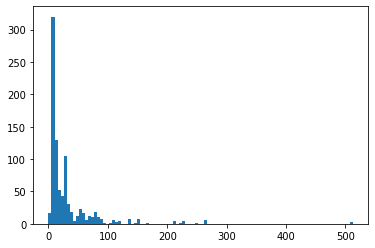

In [36]:
plt.hist(df["fare"], bins=100); # 첨도가 크면 중심 또는 평균에 몰려있다.

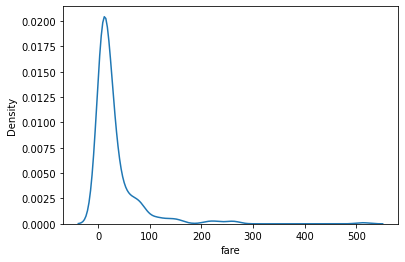

In [39]:
sns.kdeplot(data=df, x="fare");

In [32]:
print(df["fare"].mean()) # 평균
print(df["fare"].median()) # 중심

32.204207968574636
14.4542


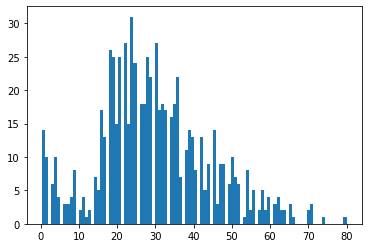

In [37]:
plt.hist(df["age"], bins=100); # 첨도가 다른 것들에 비해 작아서 몰려있지 않다.

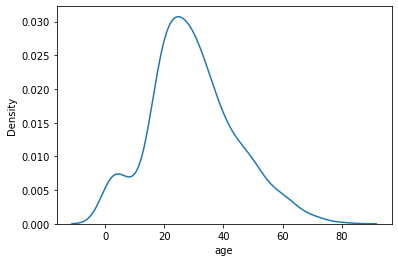

In [41]:
sns.kdeplot(data=df, x="age");

In [31]:
print(df["age"].mean()) # 평균
print(df["age"].median()) # 중심

29.69911764705882
28.0


In [42]:
df["fare"].kurtosis()

33.39814088089868

In [43]:
df["age"].kurtosis()

0.17827415364210353

In [44]:
df.skew()

C:\Users\ajouu\AppData\Local\Temp\ipykernel_20700\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


survived      0.478523
pclass       -0.630548
age           0.389108
sibsp         3.695352
parch         2.749117
fare          4.787317
adult_male   -0.420431
alone        -0.420431
dtype: float64

In [45]:
df["fare"].skew()

4.787316519674893

In [46]:
df["age"].skew()

0.38910778230082704

In [47]:
df["age"].agg(["min", "max", "mean", "median"])

min        0.420000
max       80.000000
mean      29.699118
median    28.000000
Name: age, dtype: float64

In [49]:
df[["age", "fare"]].agg(["min", "max", "mean", "median"])

,age,fare
min,0.420000,0.000000
max,80.000000,512.329200
mean,29.699118,32.204208
median,28.000000,14.454200


In [50]:
df[["age", "fare"]].agg([np.min, np.max, np.mean, np.median])

,age,fare
amin,0.420000,0.000000
amax,80.000000,512.329200
mean,29.699118,32.204208
median,28.000000,14.454200


In [51]:
df["age"].quantile(0.1)

14.0

In [83]:
df1=df["age"].dropna().sort_values() 
df1

803     0.42
755     0.67
644     0.75
469     0.75
78      0.83
       ...  
116    70.50
493    71.00
96     71.00
851    74.00
630    80.00
Name: age, Length: 714, dtype: float64

In [84]:
import math
df1_per=math.floor(len(df1)/10)
df1_per

71

In [85]:
df1.iloc[df1_per] # np.nan 제외하고 동등한 크기로 잘랐을 때, 약 10%인 지점의 값

14.0

In [86]:
df["age"].quantile(0.8)

41.0

In [88]:
df2=df["age"].dropna().sort_values() 
df2

803     0.42
755     0.67
644     0.75
469     0.75
78      0.83
       ...  
116    70.50
493    71.00
96     71.00
851    74.00
630    80.00
Name: age, Length: 714, dtype: float64

In [89]:
df2_per=math.floor((len(df2)/10)*8)
df2_per

571

In [90]:
len(df2)

714

In [91]:
df2.iloc[df2_per] # np.nan 제외하고 동등한 크기로 잘랐을 때, 약 80%인 지점의 값

41.0

In [92]:
df["who"].unique()

array(['man', 'woman', 'child'], dtype=object)

In [93]:
df["who"].nunique()

3

In [94]:
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [95]:
df["sex"].nunique()

2

In [96]:
df["fare"].mode()

0    8.05
Name: fare, dtype: float64

In [97]:
df["sex"].mode()

0    male
Name: sex, dtype: object

In [98]:
df["who"].mode()

0    man
Name: who, dtype: object

In [99]:
df["pclass"].mode()

0    3
Name: pclass, dtype: int64

In [100]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [108]:
df.corr()["survived"]

survived      1.000000
pclass       -0.338481
age          -0.077221
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
Name: survived, dtype: float64

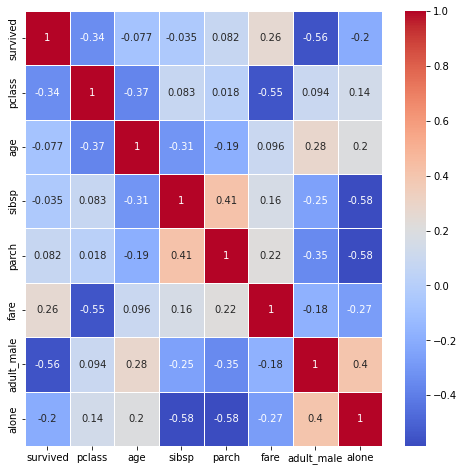

In [116]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(), annot=True, linewidths=0.5, cmap='coolwarm');